In [17]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sys
from collections import Counter
import matplotlib.pyplot as mpl
import string
import re

In [19]:
import RedditProcessing

In [21]:
class NLTKTokenizer:
    def tokenize(self, text):
        return word_tokenize(text)

In [23]:
with open('question1_tarte.json', 'r') as json_file:
    submission_data = json.load(json_file) 

In [25]:
def process(self, text):
    text = text.lower()
    text = re.sub(r"[\u2018\u2019\u2014\"'…]|(\.\.\.)|[^\x00-\x7F]", "", text)
    text = re.sub(r"[^\w\s]", "", text)  

    tokens = self.tokeniser.tokenize(text)
    tokensStripped = [tok.strip() for tok in tokens]

    regexDigit = re.compile(r"^\d+\s|\s\d+\s|\s\d+$")
    regexHttp = re.compile(r"^http")

    return [tok for tok in tokensStripped if tok not in self.lStopwords and regexDigit.match(tok) is None and regexHttp.match(tok) is None]

In [27]:
tokeniser = NLTKTokenizer() 
nltk_stopwords = set(stopwords.words('english'))
reddit_processor = RedditProcessing.RedditProcessing(tokeniser, nltk_stopwords)

processed_data = []
for submission in submission_data:
    processed_submission = {
        'video_id': submission['video_id'],
        'video_title': process(reddit_processor, submission['video_title']),
        'channel_title': process(reddit_processor, submission['channel_title']),
        'published_at': submission['published_at'],
        'description': process(reddit_processor, submission['description']),
        'links_in_description': submission['links_in_description'],
        'comments': submission['comments'],
        'processed_comments': []
    }
    
    for comment in submission['comments']:
        processed_comment = process(reddit_processor, comment)
        processed_submission['processed_comments'].append(processed_comment)
    
    processed_data.append(processed_submission)

with open('preprocessed_question1_tarte.json', 'w') as json_file:
    json.dump(processed_data, json_file, indent=4)

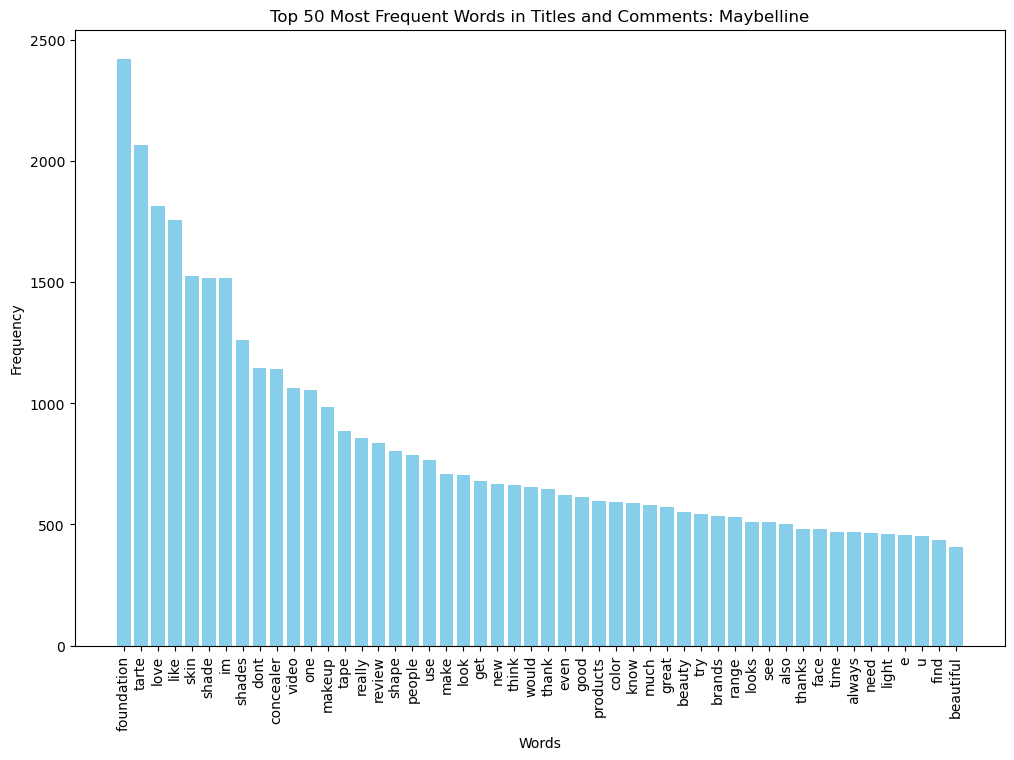

In [28]:
fJsonName = 'preprocessed_question1_tarte.json'
freqNum = 50

termFreqCounter = Counter()

with open(fJsonName, 'r') as f:
    videos = json.load(f)

    for video in videos:
        videoTitle = video.get('video_title', '')
        termFreqCounter.update(videoTitle)

        description = video.get('description', '')  
        termFreqCounter.update(description)

        comments = video.get('processed_comments', [])
        for comment in comments:
            termFreqCounter.update(comment)

most_common_terms = termFreqCounter.most_common(freqNum)

terms, counts = zip(*most_common_terms)

mpl.figure(figsize=(12, 8))
mpl.bar(terms, counts, color='skyblue')
mpl.ylabel('Frequency')
mpl.xlabel('Words')
mpl.title(f'Top {freqNum} Most Frequent Words in Titles and Comments: Maybelline')
mpl.xticks(rotation=90)  
mpl.show()